In [15]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdena')
from mglearn.make_blobs import make_blobs

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


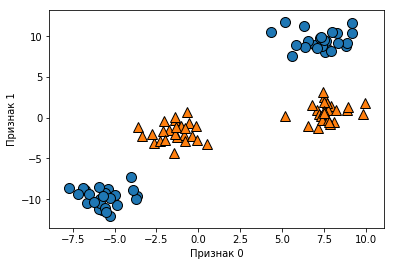

In [17]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Признак 0')
plt.ylabel("Признак 1")

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


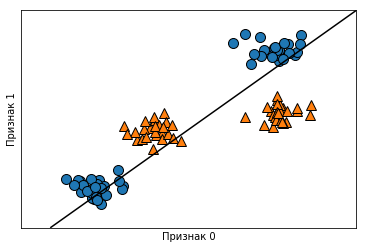

In [19]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel('Признак 1')

Text(0.5,0,'Признак 1 ** 2')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


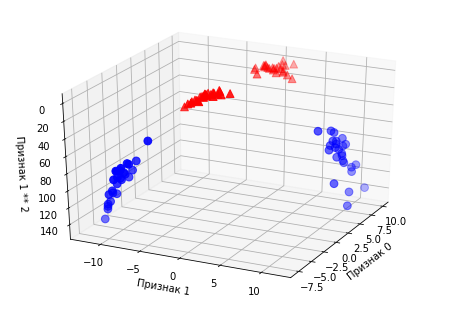

In [23]:
# Добавляем второй признак, возведенный в квадрат
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# Визуализируем в 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# Сначала размещаем на графике все точки с y == 0, затем  c y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Признак 0')
ax.set_ylabel('Признак 1')
ax.set_zlabel('Признак 1 ** 2')

Text(0.5,0,'Признак 1 ** 2')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


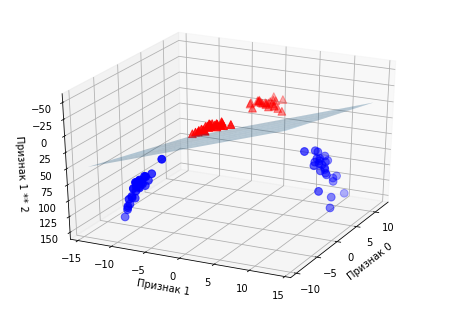

In [32]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Показать границу приняти решений л нейной модели
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('Признак 0')
ax.set_ylabel('Признак 1')
ax.set_zlabel('Признак 1 ** 2')

Text(0,0.5,'Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


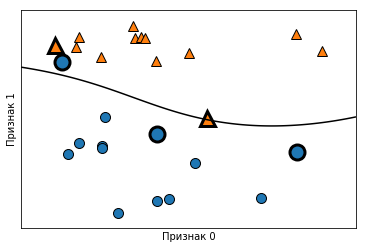

In [41]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
#Размещаем на графике опорные вектора
sv = svm.support_vectors_
# метки классов опорных векторов определяются знаком дулальныхх эффектов
sv_labels = svm.dual_coef_.ravel() > 0
mglearn. discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('Признак 0')
plt.ylabel('Признак 1')

C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


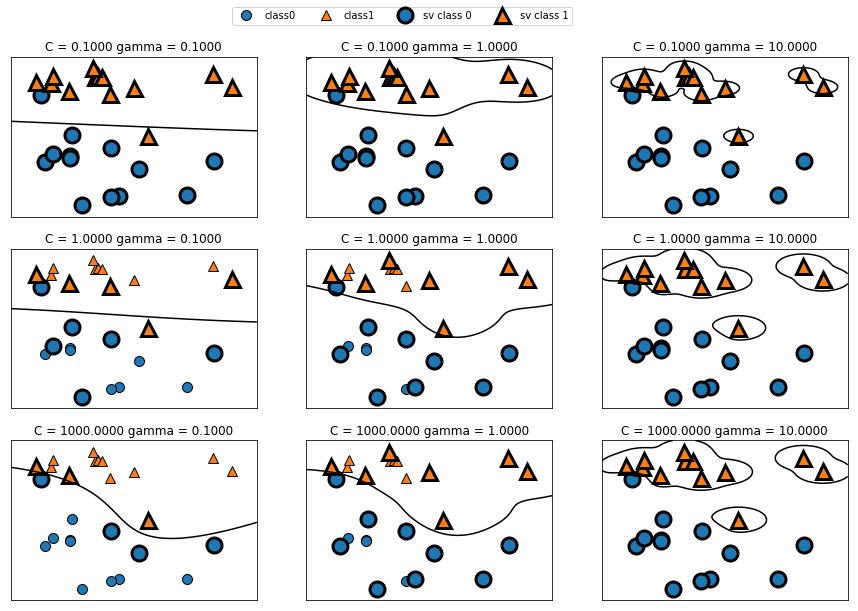

In [45]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['class0', 'class1', 'sv class 0', 'sv class 1'], ncol=4, loc=(.9, 1.2))

In [47]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print ('Правильность на обучающей выборке: {:.2f}'.format(svc.score(X_train, y_train)))
print ('Правильность на тестовой выборке: {:.2f}'.format(svc.score(X_test, y_test)))

Правильность на обучающей выборке: 1.00
Правильность на тестовой выборке: 0.63


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


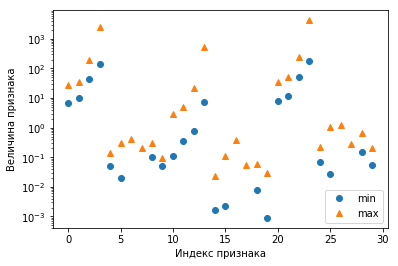

In [50]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Индекс признака")
plt.ylabel("Величина признака")
plt.yscale('log')

In [51]:
#Вычислим минимальное значение для каждого признака обучающей выборки
min_on_training = X_train.min(axis=0)
#Вычислим ширину диапазона для каждого признака (max - min) обучающего набора
range_on_rating = (X_train - min_on_training).max(axis=0)

#Вычитаем минимальное значение и затем делим на ширину диапазона
# min=0 и max=1 для каждого признака
X_train_scaled = (X_train - min_on_training) / range_on_rating
print ('Минимальное значение для каждого признака\n{}'.format(X_train_scaled.min(axis=0)))
print ('Максимальное значение для каждого признака\n{}'.format(X_train_scaled.max(axis=0)))

Минимальное значение для каждого признака
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Максимальное значение для каждого признака
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [52]:
# Используя ТО ЖЕ САМОЕ преобразование для тестового набора
# используя минимум и ширину диапазона из обучающего набора
X_test_scaled = (X_test - min_on_training) / range_on_rating

In [54]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print ('Правильность на обучающей выборке: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print ('Правильность на тестовой выборке: {:.3f}'.format(svc.score(X_test_scaled, y_test)))


Правильность на обучающей выборке: 0.948
Правильность на тестовой выборке: 0.951


In [55]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print ('Правильность на обучающей выборке: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print ('Правильность на тестовой выборке: {:.3f}'.format(svc.score(X_test_scaled, y_test)))


Правильность на обучающей выборке: 0.988
Правильность на тестовой выборке: 0.972
